<center><h1><strong>Análisis 1D de una viga</strong></h1></center>

<div align="justify">
    En el presente trabajo, se desarrolla un análisis numérico a una viga simplemente apoyada sometida a momentos flectores en los extremos, como se muestra en la Figura 1.
</div>

<img src="Images/Esquema/Viga.PNG" style="width: 400px;" />
<center><i>Figura 1.</i> Esquema general.</center>

## __Desarrollo Teórico__

<div align="justify">
    El objetivo del desarrollo teórico es el planteamiento de la ecuación diferencial del problema físico.
</div>

### Balance de fuerzas

<div align="justify">
    Realizando un corte sobre la mitad de la viga (Figura 1), 
</div>


### Solución Computacional

<div align="justify">
    Para el desarrollo teórico, se utiliza la librería <i>Sympy</i> de Python, que sirve para resolver ecuaciones simbólicas matemáticas; similar a <i>Maxima</i>, Mapple y Mathematica, por mencionar algunos software <i>CAS</i> (Computer Algebra System).
</div>

In [2]:
from sympy import init_session
from sympy.physics.continuum_mechanics.beam import Beam
init_session(use_latex=True)

IPython console for SymPy 1.4 (Python 3.7.4-32-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [5]:
M = Function('M')
M_0, H, E, I= symbols('M_0 H E I')


<div align="justify">
    La ecuación diferencial es la siguiente:
    $$
    \begin{equation}
        EI \frac{d ^2 y}{d x ^2} - M(x) = 0
        \tag{1}
        \label{dif}
    \end{equation}
    $$
</div>

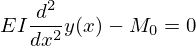

In [6]:
y = Function('y')

#Creación de ecuación
Ec = Eq(E*I*y(x).diff(x,2) - M_0*(x-H)**S(0),0)
Ec

In [81]:
sol = dsolve(Ec,ics={y(x).diff(x,3).subs(x,0):0,
                y(x).diff(x,3).subs(x,H):0,
                y(x).diff(x,2).subs(x,0):M_0,
                y(x).diff(x,2).subs(x,H):M_0})
solucion = sol.rhs
constantes = solucion([solucion.subs(x,0)-1], dict=True)
sol.subs(constantes[0])

TypeError: 'Add' object is not callable

<div align="justify">
    La solución exacta se puede apreciar en la Ecuación \ref{exacta}.
    $$
    \begin{equation}
        y(x) = \frac{M_0}{2EI} (x-H)
        \tag{2}
        \label{exacta}
    \end{equation}
    $$
</div>

## __Solución Numérica__

<img src="Images/Esquema_3D/IP.png" style="width: 400px;" />
<center><i>Figura 2.</i> Discretización de una viga.</center>

<div align="justify">
    Para el desarrollo de la solución numérica, se emplean residuos ponderados (Ecuación \ref{pond}) y colocación (Ecuación \ref{col}).
    $$
    \begin{equation}
        \int _0 ^H R(x) \Psi (x) d x = 0
        \tag{3}
        \label{pond}
    \end{equation}
    $$
    $$
    \begin{equation}
        \Psi (x) = \delta \left(x - x_i \right)
        \tag{4}
        \label{col}
    \end{equation}
    $$
</div>